In [1]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy

In [105]:
books = []
for file in os.listdir(os.getcwd()):
    if file.endswith('.json'):
        books.append(file)
        
df = pd.DataFrame()
for book in books:
    df1 = pd.read_json(book)
    df = df.append(df1)
    


In [157]:
df.head(10)

,author,book_id,category,desc,eveluate_nums,price,publisher,score,table_contents,tags,title,url
0,〔法〕古斯塔夫 · 勒庞,11173912,图书 / 非虚构,《乌合之众》是一本当之无愧的名著，他极为精致地描述了集体心态，是在社会心理学领域已经写出的著...,28087,5.99,中央编译出版社,8.3,"[被遗忘了的勒庞, 研究的两个起点, 低劣的群体心态, 群体的“道德”, 英雄与群众, 结语...","[心理学, 大众心理学, 社会学, 乌合之众, 群体心理, 贺岁书]",乌合之众：大众心理研究,https://read.douban.com/ebook/11173912/
1,〔法〕古斯塔夫·勒庞,20092726,图书 / 非虚构,《乌合之众》细致描述了群体心理的一般特征，分析了人们在群聚状态下的心理、道德、行为特征。解释...,57,2.99,译林出版社,7.3,"[ 群体的一般特征，精神统一性的心理法则, 群体的情感与道德, 群体的观念、推理和想象力...","[心理学, 大众心理学, 人文, 社会科学, 限时特价, 勒庞]",乌合之众：大众心理研究,https://read.douban.com/ebook/20092726/
2,采铜,21820932,图书 / 非虚构,盲目的努力，只是一种缓慢的叠加。在《精进：如何成为一个很厉害的人》中，作者提出了一种更有效的...,4161,12.00,凤凰联动,7.8,"[活在“全部的现在” 从当下出发，联结过去与未来, 对五年后的自己提问 如何解决远期未来与近...","[心理学, 成长, 思维, 管理]",精进：如何成为一个很厉害的人,https://read.douban.com/ebook/21820932/
3,〔奥〕阿尔弗雷德·阿德勒,19027390,图书 / 非虚构,《自卑与超越》是个体心理学的先驱阿德勒的代表作，作者从探寻人生的意义出发，启迪我们去理解真实...,223,1.99,斯坦威图书,7.2,[阿德勒：超越自卑，找到生命的真正意义],"[心理学, 哲学, 生活, 精神分析, 弗洛伊德]",自卑与超越（新版）,https://read.douban.com/ebook/19027390/
4,〔奥〕阿尔弗雷德·阿德勒,18213349,图书 / 非虚构,本书是现代社会人类必读的个体心理学经典。作者阿尔弗雷德，个体心理学的开创者，通过深入剖析与研...,86,6.99,果麦文化,7.2,"[生理缺陷, 溺爱, 忽视, 强化生活方式, 象征与隐喻, 长子女, 次子女, 幼子女, 独...","[经典, 心理学, 人性, 思考]",自卑与超越,https://read.douban.com/ebook/18213349/
5,〔德〕格尔德·米策尔,10787606,图书 / 非虚构,《心理学入门》作者用读者耳熟能详的语言进行描述，选用专业术语慎之又慎。该著不略过最基础的知识...,87,26.40,中央编译出版社,8.6,"[前言, 心理学的宗旨、观点和应用, 1 研究人的行为和经历是心理学的任务, 2 心理学是研...","[经典, 心理学, 心理, 心灵]",心理学入门,https://read.douban.com/ebook/10787606/
6,〔法〕古斯塔夫·勒庞,1239493,图书 / 非虚构,《乌合之众：大众心理研究》为社会心理学领域的经典著作，至今已被翻译成近20种语言出版。在书中...,663,13.00,理想国,8.2,"[乌合之众, 勒庞《乌合之众》的得与失, 作者前言, 导 言：群体的时代, 第一卷 群体心理...","[心理学, 社会学, 人文社科, 群体心理学, 乌合之众, 勒庞, 开学季, 了解世界]",乌合之众：大众心理研究,https://read.douban.com/ebook/1239493/
7,〔日〕渡边淳一,13351834,图书 / 虚构,医生出身的性爱文学大师渡边淳一，旨在以此书为两性架起互相认知的桥梁，让女性深入地了解男人，同...,866,11.94,磨铁数盟,7.6,"[前言, 幼少期, 彷徨与决断, 性爱的精神性, 处女情结, 肉体的记忆, 男人...","[心理学, 日本, 心理, 男人, 两性, 渡边淳一, 两性情爱指引四部曲]",男人这东西,https://read.douban.com/ebook/13351834/
8,〔美〕丹尼尔·凯斯,11337239,图书 / 虚构,1977年，美国俄亥俄州连续强暴案嫌犯比利·米利根被警方逮捕，但是他对自己犯下的罪行居然毫无...,6911,20.00,N,8.2,"[致谢, 序言, 内在人格, 第一部 混乱时期, , , , , , , 第二部 老师诞生,...","[小说, 心理学, 心理, 美国, 外国文学, 犯罪, 多重人格, 丹尼尔·凯斯]",24个比利,https://read.douban.com/ebook/11337239/
9,〔法〕居斯塔夫·勒庞,10659302,图书 / 非虚构,《乌合之众》是群体心理学的开山之作，在群体社会学方面，再也没有哪一本书像这本书这样深刻地影响...,1124,7.99,果麦文化,8.4,"[译本前言, 序, 引言——群体的时代, 卷一 群体的心理, 群体的一般特征 群体精神统一...","[心理学, 社会学, 人文社科, 群体心理学, 乌合之众, 勒庞, 果麦经典]",乌合之众：大众心理研究（法文原版中译本）,https://read.douban.com/ebook/10659302/


In [156]:
df.describe()

,book_id,eveluate_nums,price,score
count,1.030000e+03,1030.000000,1030.000000,1030.000000
mean,1.173454e+07,287.094175,10.931204,3.999612
std,7.144194e+06,1428.377044,8.372321,3.738895
min,2.440500e+05,0.000000,0.000000,0.000000
25%,7.601023e+06,2.000000,5.990000,0.000000
50%,1.079442e+07,13.500000,9.000000,6.200000
75%,1.667680e+07,70.000000,14.000000,7.500000
max,2.741202e+07,28087.000000,116.400000,9.600000


In [16]:
def tag_set(tags):
    return set(tags)


In [17]:
df.tags=df.tags.apply(tag_set)

In [23]:
#df_target=('心理学' in df.tags)

In [131]:
df_target=pd.DataFrame()

for rIndex in df.index:
        if '哲学' in df.iloc[rIndex].tags:
            print(df.iloc[rIndex])
            df_target.append(pd.DataFrame(df.iloc[rIndex]))

            
    
            

author                                                 〔奥〕阿尔弗雷德·阿德勒
book_id                                                    19027390
category                                                  图书 / 非虚构 
desc              《自卑与超越》是个体心理学的先驱阿德勒的代表作，作者从探寻人生的意义出发，启迪我们去理解真实...
eveluate_nums                                                   223
price                                                          1.99
publisher                                                     斯坦威图书
score                                                           7.2
table_contents                                 [阿德勒：超越自卑，找到生命的真正意义]
tags                                      [心理学, 哲学, 生活, 精神分析, 弗洛伊德]
title                                                     自卑与超越（新版）
url                         https://read.douban.com/ebook/19027390/
Name: 3, dtype: object
author                                                        meiya
book_id                                                     5504534
category                 

In [132]:
print(df_target)

Empty DataFrame
Columns: []
Index: []


In [160]:
df_target=pd.DataFrame()
def get_books(string):
    arr=[]
    for rIndex in df.index:
            if (string in df.iloc[rIndex].tags) or str(df.iloc[rIndex].title).find(string)>=0:
                arr.append(df.iloc[rIndex])
    return pd.DataFrame(arr)


In [162]:
print(get_books('意外'))

                              author   book_id   category  \
656  〔瑞典〕马格努斯·林奎斯特(Magnus Lindkvist)  10581155  图书 / 非虚构    

                                                  desc  eveluate_nums  price  \
656  我们每个人、每个公司、包括整个社会都在面对一个未知的世界。这世界的任何角落都会有这样或那样的...             99   12.0   

    publisher  score                                     table_contents  \
656      游遍星辰    6.8  [地狱十年, 我为什么要写这么一本书？, 意外的五个维度, 意外来袭的夜晚, 处处隐藏着意外...   

                       tags           title  \
656  [心理学, 社会学, 思维, 智慧, 意外]  意料之外：如何将意外变成惊喜   

                                         url  
656  https://read.douban.com/ebook/10581155/  


In [163]:
df_target=pd.DataFrame(arr)
df_target = df_target.reset_index(drop=True)

In [164]:

df_target.head(10)

,author,book_id,category,desc,eveluate_nums,price,publisher,score,table_contents,tags,title,url
0,〔奥〕阿尔弗雷德·阿德勒,19027390,图书 / 非虚构,《自卑与超越》是个体心理学的先驱阿德勒的代表作，作者从探寻人生的意义出发，启迪我们去理解真实...,223,1.99,斯坦威图书,7.2,[阿德勒：超越自卑，找到生命的真正意义],"[心理学, 哲学, 生活, 精神分析, 弗洛伊德]",自卑与超越（新版）,https://read.douban.com/ebook/19027390/
1,meiya,5504534,图书 / 非虚构,本书预售结束正式上架，预售期间购买的用户将可获得全部内容，其中：Web阅读器用户：全部内容将...,537,12.00,上海雅众文化,6.8,"[序 你的痛苦并非独一无二，你的努力也并不苍白虚弱, 爱是付出，是成长，是旅程, 是要冷酷...","[心理学, 哲学, 励志, 成长, meiya, 情感与成长]",他爱的是玫瑰，而你是蔷薇,https://read.douban.com/ebook/5504534/
2,〔奥〕西格蒙德·弗洛伊德,5606260,图书 / 非虚构,《自我与本我》收录了弗洛伊德后期的三篇成熟作品：《超越唯乐原则》、《集体心理学和自我的分析》...,538,6.00,上海译文出版社,8.4,"[译者序, 超越唯乐原则, , , , , , , , 集体心理学和自我的分析, 导论, ...","[心理学, 哲学, 心理, 精神分析, 弗洛伊德, 自我与本我, 译文经典]",自我与本我,https://read.douban.com/ebook/5606260/
3,〔英〕理查德·道金斯,5083852,图书 / 非虚构,《自私的基因》是20世纪最经典的著作，这版三十周年纪念版，在前版本基础上有两章增补和修订。我...,3638,27.00,中信出版社,8.7,"[周年版简介, 第二版前言, 序言, 前言, 为什么会有人呢？, 复制基因, 不朽的双...","[科普, 心理学, 哲学, 进化论, 理查德·道金斯, 贺岁书]",自私的基因,https://read.douban.com/ebook/5083852/
4,〔英〕阿兰·德波顿,1309624,图书 / 非虚构,这本书并非一本充满学术语言的“高深”著作。它用通俗、有趣的语言，为现代人解读了“身份”的前世...,6279,19.00,上海译文出版社,8.2,"[中文版序言, 界 定, 第一部分 焦虑起因, 渴求身份, 追求显耀的身份, 爱的重要性,...","[心理学, 文学, 哲学, 自我, 焦虑, 人文社科, 认识, 阿兰·德波顿]",身份的焦虑,https://read.douban.com/ebook/1309624/
5,〔奥〕佛洛伊德,655999,图书 / 非虚构,《梦的解析》最初发表于1900年，被誉为精神分析第一名著。它通过对梦境的科学探索和解释，找破...,19,2.98,新华先锋出版科技,7.9,"[导读, 一九〇〇年之前涉及梦的科学研究, 梦之解析方法的研讨：对于一个梦的解析, 梦...","[经典, 心理学, 哲学, 梦, 精神分析, 佛洛伊德, 夏日阅读, 类型小说]",梦的解析,https://read.douban.com/ebook/655999/
6,费勇,5332121,图书 / 非虚构,寒山，唐代避世隐居的禅学高僧，在欧美享有超越李白、杜甫的知名度与追捧。他是美国“垮掉的一代”...,166,10.50,凤凰联动,7.7,"[每时每刻皆为逍遥时光：禅疯子寒山的八堂修心课, 写在前面, 课前课 疯着疯着就逍遥了, 各...","[心理学, 哲学, 人生, 佛学, 人文社科, 费勇]",每时每刻皆为逍遥时光,https://read.douban.com/ebook/5332121/
7,〔美〕丹尼尔·丹内特,4546895,图书 / 非虚构,本书中，作者用缜密的逻辑和丰富的叙述，推理出我们如何在动物世界中独一无二地进化出了赋予我们自...,132,18.00,汉唐阳光,7.9,"[自由的进化, 序, 自然自由, 认清我们是什么, 我是我所是, 我们呼吸的空气, 小飞象...","[心理学, 哲学, 心理, 进化论, 科学, 人文社科, 出版社巡礼季]",自由的进化,https://read.douban.com/ebook/4546895/
8,哲不解,2192495,图书 / 非虚构,这位清华大学哲学女博士本是无心插柳，没想到一夜蹿红。她以清新健雅的笔法写了历史上最著名的二十...,1461,5.99,磨铁数盟,6.7,"[哲学十二钗正册, 老宅男康德, 处女座的黑格尔, 马克思的灵魂, 美女、才女、痴情女：汉娜...","[科普, 心理学, 哲学, 文化, 哲学家, 西方]",不疯魔，不哲学,https://read.douban.com/ebook/2192495/
9,〔奥〕弗洛伊德,4575846,图书 / 非虚构,即日起至7月30日，购买全套《弗洛伊德文集》（ http://dou.bz/0PBMpw）即...,16,8.00,华文天下,8.0,"[达·芬奇的童年回忆, 戏剧中的变态人物, 按 语, 詹森的《格拉迪沃》中的幻觉与梦, 按 ...","[心理学, 哲学, 弗洛伊德, 人文社科, 达·芬奇, 车文博, 弗洛伊德文集]",达·芬奇的童年回忆,https://read.douban.com/ebook/4575846/


In [107]:
df = df.drop_duplicates(subset='book_id')
df = df.reset_index(drop=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 12 columns):
author            1030 non-null object
book_id           1030 non-null int64
category          1030 non-null object
desc              1030 non-null object
eveluate_nums     1030 non-null int64
price             1030 non-null float64
publisher         1030 non-null object
score             1030 non-null float64
table_contents    1030 non-null object
tags              1030 non-null object
title             1030 non-null object
url               1030 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 96.6+ KB


In [6]:
index_high = (df.score >=8)
index_popular = df.eveluate_nums >= 0
top_list = index_high & index_popular

In [7]:
df[top_list][['title','score','author','publisher','eveluate_nums']].sort_values(by=['score','eveluate_nums'],ascending=False)[:10]

,title,score,author,publisher,eveluate_nums
135,武志红心智成长系列（三册套装）,9.6,武志红,游遍星辰,20
46,爱是唯一的真相,9.5,〔美〕布莱恩· 魏斯,游遍星辰,24
9,精神分析引论,9.4,〔奥〕西格蒙德·弗洛伊德,游遍星辰,31
8,狡猾的情感,9.3,〔以〕埃亚尔·温特（Eyal Winter）,游遍星辰,38
320,错把妻子当帽子,9.3,〔美〕奥利弗·萨克斯,游遍星辰,30
181,潜意识与心灵成长,9.2,〔瑞士〕 卡尔·古斯塔夫·荣格,游遍星辰,43
133,精神分析与灵魂治疗,9.1,"〔瑞士〕荣格（Jung,C.G.）",游遍星辰,44
10,心理学与文学,9.1,〔瑞士〕卡尔·古斯塔夫·荣格,游遍星辰,30
348,最好的告别,9.0,〔美〕阿图·葛文德,游遍星辰,6307
79,我们时代的神经症人格,9.0,〔美〕卡伦·霍妮,游遍星辰,59


In [ ]:
数据清洗

In [57]:
import re
#把常见的标题引语删除

def trim_word(strings):
    newstring=[]
    for string in strings:
        r=re.compile(r'^第.*节|^第.*部分|^序言|^前言|^导读|^致谢|^引言|^第.*部|^第.*卷|^\d.\d') 
        newstring.append(r.sub('',string))
    return newstring

In [43]:
print(trim_word(df.loc[0].table_contents))

['被遗忘了的勒庞', '研究的两个起点', '低劣的群体心态', '群体的“道德”', '英雄与群众', '结语：群体的时代与民主', '群体的冲动、易变和急躁', '群体的易受暗示和轻信', '群体情绪的夸张与单纯', '群体的偏执、专横和保守', '群体的道德', '群体的观念', '群体的理性', '群体的想象力', '种族', '传统', '时间', '政治和社会制度', '教育', '形象、词语和套话', '幻觉', '经验', '理性', '群体的领袖', '领袖的动员手段：断言、重复和传染', '名望', '牢固的信念', '群众意见的多变', '异质性群体', '同质性群体']


In [14]:
print(df.loc[1])

author                                                   〔法〕古斯塔夫·勒庞
book_id                                                    20092726
category                                                  图书 / 非虚构 
desc              《乌合之众》细致描述了群体心理的一般特征，分析了人们在群聚状态下的心理、道德、行为特征。解释...
eveluate_nums                                                    57
price                                                          2.99
publisher                                                     译林出版社
score                                                           7.3
table_contents    [　群体的一般特征，精神统一性的心理法则, 　群体的情感与道德, 　群体的观念、推理和想象力...
tags                               [心理学, 大众心理学, 人文, 社会科学, 限时特价, 勒庞]
title                                                   乌合之众：大众心理研究
url                         https://read.douban.com/ebook/20092726/
Name: 1, dtype: object


In [58]:
df.clean_contents=df.table_contents.apply(trim_word)

In [51]:
import jieba

In [6]:
print(df.clean_contents)

AttributeError: 'DataFrame' object has no attribute 'clean_contents'

In [50]:
print(df.loc[0].clean_contents)

AttributeError: 'Series' object has no attribute 'clean_contents'

In [85]:
seg_list= jieba.lcut(df.loc[0].table_contents,cut_all=False) # 精确模式

In [65]:
print(df.loc[1025])

author                                                           刘懿
book_id                                                    15839007
category                                                  图书 / 非虚构 
desc              头部动作5法则，面部表情7要点，轻松避免社交尴尬，眼神交汇8概念，第一时间识破手内心，10种...
eveluate_nums                                                     6
price                                                             3
publisher                                                      游遍星辰
score                                                             0
table_contents    [奇而实用的身体语言, 类对身体语言的探索, 体语言的来源, 制身体语言的“司令部”, 体语...
tags                                        [心理学, 心理, 科学, 趣味, 人际关系]
title                                                        身体语言密码
url                         https://read.douban.com/ebook/15839007/
Name: 1025, dtype: object


['被', '遗忘', '了', '的', '勒庞']


In [136]:
def get_words(strings):
    s = []
    new_string=[]
    # for word, weight in jieba.analyse.extract_tags(string, topK=10,withWeight=True):
    pun = [u'【',u'】',u'（',u'）',u'，',u',',u'。',u'？',u'！',u'!',u'；',u'、',u'：',u'-',u'%',u'(',u')',u':',u'.',u':',u'"',u'$',u'~',u'\u3000',u'的',u'']
    for string in strings:
        s=jieba.lcut(string,cut_all=False)
        new_s = filter(lambda x: x not in pun, s)
        new_string.append(' '.join(new_s))
    return new_string

In [137]:
print(get_words(df.loc[0].table_contents))

['被 遗忘 了 勒庞', '研究 两个 起点', '低劣 群体 心态', '群体 “ 道德 ”', '英雄 与 群众', '结语 群体 时代 与 民主', '群体 冲动 易变 和 急躁', '群体 易 受 暗示 和 轻信', '群体 情绪 夸张 与 单纯', '群体 偏执 专横 和 保守', '群体 道德', '群体 观念', '群体 理性', '群体 想象力', '种族', '传统', '时间', '政治 和 社会制度', '教育', '形象 词语 和 套话', '幻觉', '经验', '理性', '群体 领袖', '领袖 动员 手段 断言 重复 和 传染', '名望', '牢固 信念', '群众 意见 多变', '异质性 群体', '同质性 群体']


In [52]:
#对每一行目录分词后，全部连接成为一个字符串
def get_words_all(strings):
    s = []
    new_string=[]
    # for word, weight in jieba.analyse.extract_tags(string, topK=10,withWeight=True):
    pun = [u'【',u'】',u'（',u'）',u'，',u',',u'。',u'？',u'！',u'!',u'；',u'、',u'：',u'-',u'%',u'(',u')',u'”',u'.',u':',u'“',u'$',u'~',u'\u3000',u'的']
    for string in strings:
        s=jieba.lcut(string,cut_all=False)
        new_s = filter(lambda x: x not in pun, s)
        new_string.append(' '.join(new_s))
        
    return ' '.join(new_string)
        

In [72]:
print(get_words_all(df.loc[0].clean_contents))

AttributeError: 'Series' object has no attribute 'clean_contents'

In [73]:
df.cut_contents=df.clean_contents.apply(get_words_all)

In [74]:
print(df.cut_contents)

0       被 遗忘 了 勒庞 研究 两个 起点 低劣 群体 心态 群体 道德 英雄 与 群众 结语 群...
1       群体 一般 特征 精神 统一性 心理 法则 群体 情感 与 道德 群体 观念 推理 和 想象...
2       活在 全部 现在   从 当下 出发 联结 过去 与 未来 对 五年 后 自己 提问   如...
3                                   阿德勒 超越 自卑 找到 生命 真正 意义
4       生理 缺陷 溺爱 忽视 强化 生活 方式 象征 与 隐喻 长 子女 次 子女 幼子 女 独生...
5        心理学 宗旨 观点 和 应用 1 研究 人 行为 和 经历 是 心理学 任务 2 心理学 ...
6       乌合之众 勒庞 《 乌合之众 》 得与失 作者 前言 导   言 群体 时代   群体 心理...
7        幼少期 彷徨 与 决断 性爱 精神性 处女 情结 肉体 记忆 男人 为何 流连 花巷 结婚...
8         内在 人格   混乱 时期         老师 诞生                超...
9       译本 前言 序 — — 群体 时代 卷 一 群体 心理   群体 一般 特征 群体 精神 统...
10      读心术   真能 读懂 别人 心思 吗 笛卡尔 大 错误 非 语言 和 无意识 你 已经 在...
11      你 就是 脸皮 太薄   我 也 曾经 脸皮 不够 厚 幸好 有 85 条 羞怯 克星   ...
12      序   你 痛苦 并非 独一无二 你 努力 也 并 不 苍白 虚弱   爱是 付出 是 成长...
13      遇见 孩子 遇见 更好 自己   让 我们 彼此 关照 共同 成长   遇见 孩子 遇见 更...
14      译者 序 超越 唯乐 原则        集体 心理学 和 自我 分析   导论   勒邦 ...
15      周年 版 简介 第二 版 前言     为什么 会 有人 呢   复制基因   不朽 双螺旋...
16      不 拼 现在 拿 什么 赢 将来   成功 是 什么   锚定 成功 成功 最 重要 因素 ...
17       充分利用 

In [82]:
print(df.clean_contents[5])

['', '心理学的宗旨、观点和应用', '1\u3000研究人的行为和经历是心理学的任务', '2\u3000心理学是研究领域', '2.1\u3000科学研究的目的', '2.2\u3000科学调查的若干特征', '3\u3000关于人类行为的观点', '3.1\u3000科学心理学的开端', '3.2\u3000近代的理论观点', '4\u3000应用心理学的若干工作领域', '4.1\u3000教育心理学', '4.2\u3000健康心理学', '4.3\u3000环境心理学', '4.4\u3000犯罪和司法心理学', '4.5\u3000临床心理学', '4.6\u3000劳动心理学、企业和组织心理学', '5\u3000后续章节展望', '人类的发展心理学：基础和开端', '1\u3000发展心理学的目的', '2\u3000发展心理学的基本问题', '2.1\u3000发育的连续性或者间歇性', '2.2\u3000遗传—环境问题', '3\u3000出生前的发育', '4\u3000出生', '4.1\u3000出生的正常过程', '4.2\u3000分娩并发症', '5\u3000童年早期', '5.1\u3000身体运功机能的发育', '5.2\u3000视力的发育', '5.3\u3000社会—情感联系的发育', '5.4\u3000认知功能的发育', '5.5\u3000语言能力的发育', '5.6\u3000符号功能', '6\u3000学龄前儿童', '6.1\u3000认知发育', '6.2\u3000社会发展', '7\u3000入学儿童', '7.1\u3000认知发育', '7.2\u3000道德判断力的发育', '7.3\u3000友情关系的发展', '青春期和成年后的发育', '1\u3000青春期', '1.1\u3000入学儿童和成年人之间的发育阶段', '1.2\u3000身体上的变化', '1.3\u3000认知发育', '1.4\u3000父母的教育方式', '1.5\u3000重新调整父母与子女的关系', '1.6\u3000寻找自我身份', '2\u3000成人期', '2.1\u3000成年期发展的若干基础', '2.2\u3000所选择的领域的发展', '2.3\u3000人到中年', '2.4\u3000

In [66]:
import jieba.analyse
text = jieba.analyse.extract_tags(df.cut_contents[0], topK=10, withWeight=True)

In [67]:
print(text)  #不太理解权重的算法，为什么像“结语”这样只出现了一次的词也会排在前10？

[('群体', 1.407222641872174), ('道德', 0.20672998377768115), ('领袖', 0.20220479002695652), ('理性', 0.2002753844884058), ('异质性', 0.18136787378115943), ('同质性', 0.18136787378115943), ('群众', 0.1746098316231884), ('勒庞', 0.17325750004202897), ('结语', 0.16961526195072466), ('易变', 0.16544595655362318)]


In [87]:
print(jieba.analyse.extract_tags(df.clean_contents[0][0], topK=10, withWeight=True))

[('勒庞', 5.97738375145), ('遗忘', 4.4759588808)]


In [75]:
def get_keyword(string):
    return jieba.analyse.extract_tags(string, topK=10)


In [76]:
df.keywords=df.cut_contents.apply(get_keyword)

In [77]:
print(df.keywords)

0              [群体, 道德, 领袖, 理性, 异质性, 同质性, 群众, 勒庞, 结语, 易变]
1           [群体, 意见, 信念, 刑事法庭, 陪审团, 统一性, 因素, 选民, 想象力, 推理]
2               [学习者, 思考, 才能, 选择, 人生, 自己, 提问, 未来, 做到, 挑战]
3                           [阿德勒, 自卑, 超越, 生命, 找到, 意义, 真正]
4              [童年, 方式, 缺陷, 婚姻, 生理, 生活, 子女, 性格, 培养, 过失犯罪]
5         [心理学, 2.1, 情感, 2.2, 1.2, 1.1, 感觉, 发育, 3.1, 1.3]
6            [群体, 信念, 意见, 乌合之众, 分类, 心理, 得与失, 代译, 勒庞, 对照表]
7              [性爱, 花巷, 衍续, 幼少期, 男人, 出轨, 精神性, 花心, 孱弱, 流连]
8                [附记, 后记, 尾声, 人格, 内在, 超越, 诞生, 混乱, 疯狂, 老师]
9               [群体, 信念, 主张, 多变, 领袖, 想象力, 推理, 道德, 观念, 分类]
10              [读心术, 读心, 亲善, 魔法, 练习, 小结, 提议, 情感, 哪些, 关系]
11             [害羞, 羞怯, 脸皮, 克星, 脸皮厚, 自己, 脸皮薄, 冷场, 七种, 不够]
12        [爱是, 自己, 搞不定, 爱侣, 水乳交融, 亲密关系, 相敬如宾, 放弃, 旅程, 孤寂]
13             [遇见, 孩子, 更好, 父母, 成长, 怎样, 贬低, 心智, 价值观念, 旅程]
14          [自我, 附录, 集体, 力比多, 无意识, 勒邦, 心理, 储存器, 唯乐, 原始部落]
15            [复制基因, 基因, 机器, 集萃, 觅母, 搔痒, 双螺旋, 代际, 前言, 简介]
16            [成功, 些小, 摸索, 永远, 结好果, 总好, 创造, 锚定, 改变命运, 最好]
17            

In [ ]:
#把所有关键词放在一起，再求一次关键词

In [ ]:
＃把所有书的目录放在一起，直接求关键词

In [85]:
print(jieba.analyse.textrank(df.cut_contents[0], topK=10, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v')) )

[('群体', 1.0), ('领袖', 0.20511396711739666), ('理性', 0.20237567085561067), ('群众', 0.17832885475376212), ('勒庞', 0.12790480668155402), ('传统', 0.12492295423409466), ('意见', 0.12472436236191424), ('种族', 0.11828617538537618), ('动员', 0.11747300568496719), ('教育', 0.11566129835817375)]


In [96]:
print(df.cut_contents[0])

被 遗忘 了 勒庞 研究 两个 起点 低劣 群体 心态 群体 道德 英雄 与 群众 结语 群体 时代 与 民主 群体 冲动 易变 和 急躁 群体 易 受 暗示 和 轻信 群体 情绪 夸张 与 单纯 群体 偏执 专横 和 保守 群体 道德 群体 观念 群体 理性 群体 想象力 种族 传统 时间 政治 和 社会制度 教育 形象 词语 和 套话 幻觉 经验 理性 群体 领袖 领袖 动员 手段 断言 重复 和 传染 名望 牢固 信念 群众 意见 多变 异质性 群体 同质性 群体


In [130]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from scipy.misc import imread

In [135]:
text = jieba.analyse.extract_tags(df.cut_contents[0], topK=10, withWeight=True)

stop=STOPWORDS.add("结语")
base_image = imread("book.jpg")
wc = WordCloud(background_color="white",  stopwords=STOPWORDS.add("结语"),font_path='/Library/Fonts/华文仿宋.ttf', 
               max_words=10, mask=base_image,max_font_size=40, random_state=42)
wc.generate_from_frequencies(text)
image_colors = ImageColorGenerator(base_image)

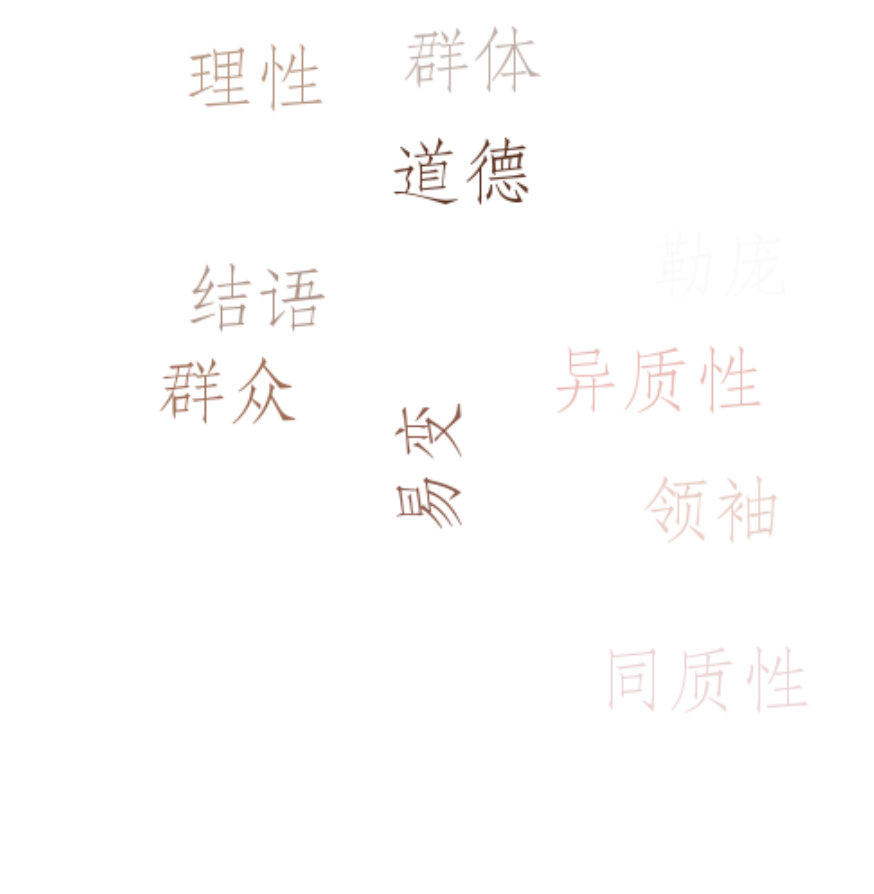

In [136]:
plt.figure(figsize = (15,30))
plt.imshow(wc.recolor(color_func=image_colors),aspect='equal')
plt.axis("off")
plt.show()

In [120]:
model = smf.logit("score ~ eveluate_nums+price ", data=df)
result = model.fit() 
print(result.summary())

ValueError: endog must be in the unit interval.

In [122]:
linear_model = smf.ols(formula='score ~ eveluate_nums', data=df)
results = linear_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     42.82
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           9.47e-11
Time:                        17:29:04   Log-Likelihood:                -2798.3
No. Observations:                1030   AIC:                             5601.
Df Residuals:                    1028   BIC:                             5611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         3.8493      0.116     33.045      0.000         3.621     4.078
eveluate_nums     0.0005      8e-05      6.543      0.000         0.000     0.001
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.719   Jarque-Bera (JB):              145.301
Skew:                          -0.062   Prob(JB):                     2.81e-32
Kurtosis:                       1.164   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.578
Date:                Mon, 07 Nov 2016   Prob (F-statistic):            0.00610
Time:                        17:38:15   Log-Likelihood:                -689.28
No. Observations:                 557   AIC:                             1383.
Df Residuals:                     555   BIC:                             1391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         7.3691      0.037    200.588      0.000         7.297     7.441
eveluate_nums  5.107e-05   1.86e-05      2.753      0.006      1.46e-05  8.75e-05
==============================================================================
Omnibus:                        8.556   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.662
Skew:                          -0.261   Prob(JB):                       0.0132
Kurtosis:                       3.317   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
dfscore=df.groupby("score")["score"].count()
print(dfscore)


score
0.0    473
4.0      1
4.7      1
5.0      1
5.1      3
5.4      3
5.5      1
5.6      2
5.7      6
5.8      3
5.9      8
6.0      5
6.1      6
6.2      8
6.3     13
6.4     15
6.5      8
6.6     12
6.7     19
6.8     27
6.9     15
7.0     20
7.1     22
7.2     37
7.3     21
7.4     33
7.5     22
7.6     25
7.7     27
7.8     28
7.9     27
8.0     13
8.1     16
8.2     27
8.3     15
8.4     12
8.5     10
8.6     10
8.7      8
8.8      5
8.9      9
9.0      5
9.1      2
9.2      1
9.3      2
9.4      1
9.5      1
9.6      1
Name: score, dtype: int64


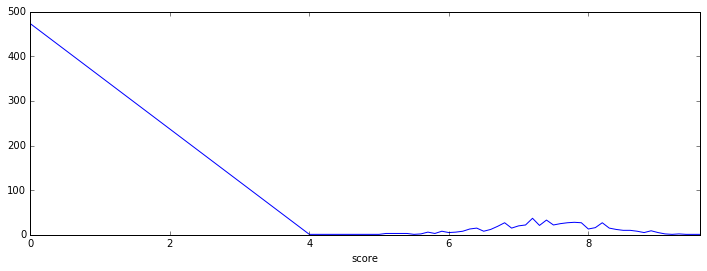

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
dfscore.plot(kind='line',ax=ax)
ax1.set_xlabel("# cities in top 105")